In [1]:
#free additional online leanring
#scikit learn tutorial online is worth the time
#Toptal, good introduction to machine learning
#robotics department from Stanford has free online textbook
#cs Stanford lecture notes etc. online free -- one of the best free online machine learninng resources
#Andrew Ng has really good udemy and youtube stuff

In [2]:
#see word document for notes

In [4]:
#Analyzing data set of house pricing in boston

In [18]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline

In [3]:
from sklearn.datasets import load_boston

In [4]:
boston = load_boston()

In [5]:
print boston.DESCR

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [6]:
#median value (MEDV) of owner-occupied homes in $1000s will be the target

In [7]:
#lets do a quick histogram of the prices

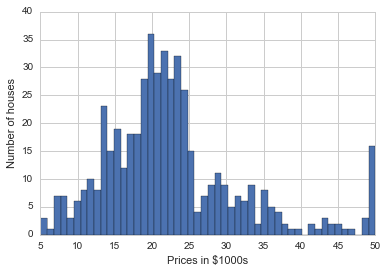

In [8]:
plt.hist(boston.target, bins=50)
#target is just there because this is a demo data set
plt.xlabel('Prices in $1000s')
plt.ylabel('Number of houses')

In [11]:
#what about a scatter plot of a single feature vs target?
#scatter housing price vs number of rooms in a dwelling (RM, it's index is 5)

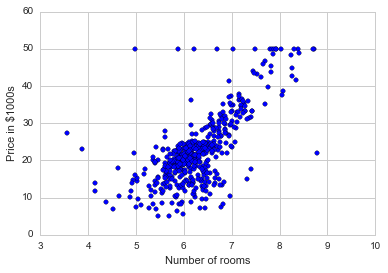

In [13]:
plt.scatter(boston.data[:,5],boston.target)
#data is a list I believe and we want everything in the fifth index, target is the price
plt.ylabel('Price in $1000s')
plt.xlabel('Number of rooms')

In [14]:
#somewhat of a trend, it makes sense that we would see a positive correlation

In [15]:
#lets use pandas to transform this into a dataframe and use seaborn to analyze it further

In [20]:
boston_df = DataFrame(boston.data)

boston_df.columns = boston.feature_names

boston_df.head()
#.data and .feature_names are just here for this training data set

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [21]:
#lets add the target to the boston dataset to the price
boston_df['Price'] = boston.target

In [22]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


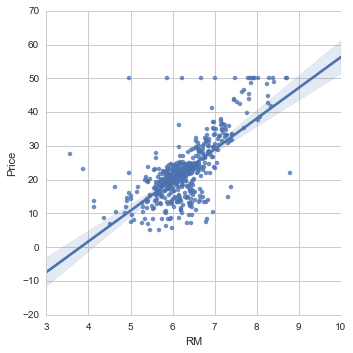

In [23]:
#lets do a linear regression automatically on this with seaborn
sns.lmplot('RM','Price', data = boston_df)

In [24]:
#now we have a simple linear fit model to the data. Can't do this however when we get into 
#more complicated material

In [25]:
#how we the line is the best fit is the basis of least squares method

In [27]:
#lets use Numpy for univariate linear regression
#since we're only concentrated on comparing with number of rooms per house this matrix we're going to use
#is going to be 1 dimension wide

In [39]:
X = boston_df.RM
X.head()

0    6.575
1    6.421
2    7.185
3    6.998
4    7.147
Name: RM, dtype: float64

In [40]:
X.shape

(506,)

In [46]:
#rearrange for numpy
X = np.vstack(boston_df.RM)


In [33]:
X.shape

(506, 1)

In [41]:
#numpy needs to know how many values you have, 506, and how many attributes, just 1 becayse we're looking at roomsize

In [42]:
Y = boston_df.Price

In [43]:
#now that we have x and y we can use numpy to create univariate linear regression

In [47]:
X

array([[ 6.575],
       [ 6.421],
       [ 7.185],
       [ 6.998],
       [ 7.147],
       [ 6.43 ],
       [ 6.012],
       [ 6.172],
       [ 5.631],
       [ 6.004],
       [ 6.377],
       [ 6.009],
       [ 5.889],
       [ 5.949],
       [ 6.096],
       [ 5.834],
       [ 5.935],
       [ 5.99 ],
       [ 5.456],
       [ 5.727],
       [ 5.57 ],
       [ 5.965],
       [ 6.142],
       [ 5.813],
       [ 5.924],
       [ 5.599],
       [ 5.813],
       [ 6.047],
       [ 6.495],
       [ 6.674],
       [ 5.713],
       [ 6.072],
       [ 5.95 ],
       [ 5.701],
       [ 6.096],
       [ 5.933],
       [ 5.841],
       [ 5.85 ],
       [ 5.966],
       [ 6.595],
       [ 7.024],
       [ 6.77 ],
       [ 6.169],
       [ 6.211],
       [ 6.069],
       [ 5.682],
       [ 5.786],
       [ 6.03 ],
       [ 5.399],
       [ 5.602],
       [ 5.963],
       [ 6.115],
       [ 6.511],
       [ 5.998],
       [ 5.888],
       [ 7.249],
       [ 6.383],
       [ 6.816],
       [ 6.145

In [50]:
# [X 1] using list comprehension

In [49]:
X = np.array( [[value,1] for value in X])

In [51]:
X

array([[array([ 6.575]), 1],
       [array([ 6.421]), 1],
       [array([ 7.185]), 1],
       ..., 
       [array([ 6.976]), 1],
       [array([ 6.794]), 1],
       [array([ 6.03]), 1]], dtype=object)

In [53]:
#now we can get our best fit values and the m and b values we will need

markdown

In [55]:
m , b = np.linalg.lstsq(X,Y)[0]


In [56]:
#[0] because we only want the first value. this is using np's linear algebra library

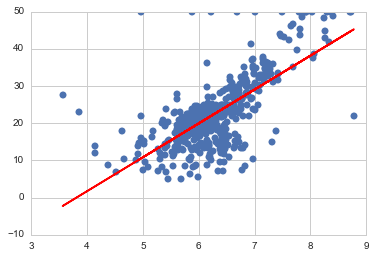

In [57]:
plt.plot(boston_df.RM,boston_df.Price,'o')
#create our scatter plot
#now let's plot our best fit line that we just made in numpy
x = boston_df.RM

plt.plot(x, m*x + b, 'r', label='Best fit line')

In [58]:
#lets find the root mean square error in our fitted line

In [59]:
#get array
result = np.linalg.lstsq(X,Y)

error_total = result[1]
#result[1] is the error by default

rmse = np.sqrt(error_total/len(X))

print ' The root mean square error was %.2f' %rmse

 The root mean square error was 6.60


In [60]:
#95% of the time the value is going to be off by 2 times of the rmse 
#remember 68-95-99.7 rule aka 1, 2, and 3 standard deviations away from the mean

In [61]:
#now lets look at a multivariate regression

In [62]:
import sklearn
from sklearn.linear_model import LinearRegression

In [63]:
#now lets create a linear regression object
lreg = LinearRegression()

In [65]:
X_multi = boston_df.drop('Price',1)
#comparing against the other columns in the df but not against the target itself
#in order to drop a column, have to use 1 index
#didn't drop in place so didn't affect our original df
Y_target = boston_df.Price

In [66]:
lreg.fit(X_multi,Y_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [68]:
print ' The estimated intercept coefficient is %.2f' %lreg.intercept_

print ' The number of coefficients used was %d ' %len(lreg.coef_)

#if we look at the documentation, lreg.coef_ will give us access to the coefficients and likewise with intercept

 The estimated intercept coefficient is 36.49
 The number of coefficients used was 13 


In [70]:
coeff_df = DataFrame(boston_df.columns)
coeff_df.columns = ['Features']

coeff_df['Coefficient Estimate'] = Series(lreg.coef_)

In [71]:
coeff_df

,Features,Coefficient Estimate
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


In [72]:
#all we did was create a new df based on columns from original dataframe using the features columns 
#from original boston_df which gives their original names. And created a new column for coefficient estimates from lreg results

In [73]:
#seems that RM has the highest correlated feature between any particular feature and house price (3.8)

In [74]:
#Training and Validation

In [75]:
X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(X,boston_df.Price)
#scikitlearn takes 
print X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

(379, 2) (127, 2) (379,) (127,)


In [76]:
#splits data along these lines for training and testing

In [77]:
lreg = LinearRegression()
lreg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [80]:
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

In [83]:
print " Fit a model X_train, and then calculate mean square error with Y_train: %2f " % np.mean((Y_train-pred_train)**2)
#taking difference between Y_training object and Y_pred object and squaring that and taking the mean
print " Fit a model X_train, and calculate the mean square error with X_test and Y_test: %2f " %np.mean((Y_test - pred_test)**2)

 Fit a model X_train, and then calculate mean square error with Y_train: 45.333158 
 Fit a model X_train, and calculate the mean square error with X_test and Y_test: 38.452801 


In [84]:
# a little bit off here. We want to do a residual plot to vizualize how good our analysis was

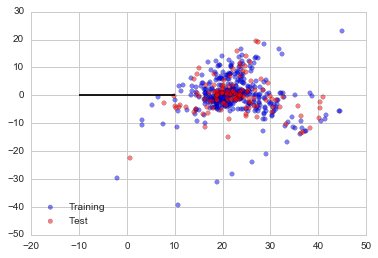

In [85]:
train = plt.scatter(pred_train,(pred_train - Y_train),c='b',alpha=0.5)

test = plt.scatter(pred_test,(pred_test-Y_test),c='r',alpha = 0.5)

plt.hlines(y=0,xmin=-10,xmax=10)

plt.legend((train,test),('Training','Test'),loc = 'lower left')

In [86]:
#doesn't really appear to be any pattern, we're seeing a semi random scatter and that's good since that means we have good randomized error

In [87]:
#this graph suppports the idea that a linearr regression was a good choice since this graph could give us indication if there was a relationship we were missing